<a href="https://colab.research.google.com/github/AEghtedariNaeini/CMGI_intro/blob/main/Atefe_eghtedari_MLP_carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 18lwkLWYpgaxa-8j76mCEZ1zN6V4NbVwW

Downloading...
From: https://drive.google.com/uc?id=18lwkLWYpgaxa-8j76mCEZ1zN6V4NbVwW
To: /content/CarPrice_Assignment5.csv
100% 69.6k/69.6k [00:00<00:00, 65.1MB/s]


In [ ]:
df= pd.read_csv('/content/CarPrice_Assignment5.csv')

In [ ]:
df.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.732837,0.811148,0.886584,...,0.398773,0.0,0.880711,0.642686,0.391304,0.385417,0.757576,0.428571,0.500000,0.297247
1,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.732837,0.811148,0.886584,...,0.398773,0.0,0.880711,0.642686,0.391304,0.385417,0.757576,0.428571,0.500000,0.363436
2,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.781638,0.822681,0.905947,...,0.466258,0.0,0.680203,0.832134,0.391304,0.534722,0.757576,0.387755,0.481481,0.363436
3,0.045455,0.0,0.0,1.0,0.50,0.5,0.0,0.825476,0.848630,0.915629,...,0.334356,0.0,0.809645,0.815348,0.434783,0.354167,0.833333,0.489796,0.555556,0.307269
4,0.045455,0.0,0.0,1.0,0.50,1.0,0.0,0.822167,0.848630,0.918396,...,0.417178,0.0,0.809645,0.815348,0.347826,0.399306,0.833333,0.367347,0.407407,0.384361


In [ ]:
 X = df.drop('price', axis=1)
 y = df['price']

In [ ]:
print(y.describe())

count    205.000000
mean       0.292439
std        0.175966
min        0.112731
25%        0.171542
50%        0.226762
75%        0.363502
max        1.000000
Name: price, dtype: float64


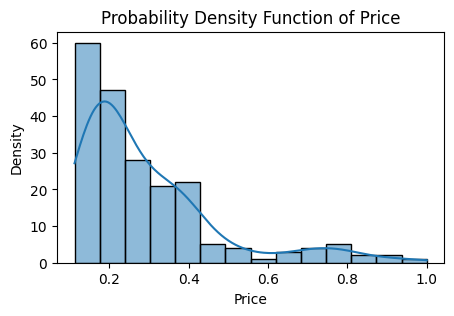

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.histplot(df['price'], kde=True)
plt.title('Probability Density Function of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <font color='gray'>**select activation function**</font>
differences between those activation functions:

* **identity**: This is a linear activation function. It means the output of the neuron is directly proportional to the input (output = input). It's not typically used in hidden layers of deep neural networks because it doesn't introduce non-linearity, which is crucial for learning complex patterns.
* **logistic** (also known as sigmoid): This function squashes the input into a range between 0 and 1. It's often used in the output layer **for binary classification problems** (predicting probabilities). However, it suffers from the vanishing gradient problem for very large or small inputs, which can hinder training in deep networks.
* **tanh** (hyperbolic tangent): Similar to the logistic function, but it squashes the input into a **range between -1 and 1** . It's generally preferred over the logistic function in hidden layers because its output is centered around zero, which can help with training. It also suffers from the vanishing gradient problem.
* **relu** (Rectified Linear Unit): This function outputs the input directly if it's positive, and zero otherwise (output = max(0, input)). It's the most widely used activation function in hidden layers due to its simplicity and effectiveness. It helps mitigate the vanishing gradient problem and speeds up training. However, it can suffer from the "dying ReLU" problem where neurons can become inactive if their input is always negative.
In your current code, you are using relu, which is a good default choice for the hidden layers of your MLPRegressor.

 in this case we can use <font color='green'>*logistic*</font> or <font color='green'>*relu*</font> beacuse price has posetive value.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_relu_adam = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # two layers, 128 and 64 neurons
    activation='relu',
    solver='adam',
    alpha=0.001,  # regularization strength
    learning_rate_init=0.029,
    max_iter=90,
    early_stopping=True,
    random_state=42,
    verbose=True
)

In [ ]:
mlp_relu_adam.fit(X_train_scaled, y_train)
# Predict & evaluate
y_pred_relu_adam = mlp_relu_adam.predict(X_test_scaled)
mse_relu_adam = mean_squared_error(y_test, y_pred_relu_adam)
print('*'*40)
print(f"Test Mean Squared Error by relu_adam: {mse_relu_adam:.4f}")


Iteration 1, loss = 0.05665419
Validation score: -293.128914
Iteration 2, loss = 5.28820065
Validation score: -19.682748
Iteration 3, loss = 0.64464512
Validation score: -3.186173
Iteration 4, loss = 0.09693856
Validation score: -0.517103
Iteration 5, loss = 0.04124689
Validation score: 0.650381
Iteration 6, loss = 0.01060551
Validation score: 0.702616
Iteration 7, loss = 0.00521410
Validation score: 0.324185
Iteration 8, loss = 0.00931247
Validation score: -0.057703
Iteration 9, loss = 0.01362665
Validation score: -0.293193
Iteration 10, loss = 0.01643681
Validation score: -0.329204
Iteration 11, loss = 0.01714227
Validation score: -0.245473
Iteration 12, loss = 0.01615669
Validation score: -0.083125
Iteration 13, loss = 0.01399333
Validation score: 0.137057
Iteration 14, loss = 0.01109069
Validation score: 0.377081
Iteration 15, loss = 0.00793148
Validation score: 0.591221
Iteration 16, loss = 0.00508151
Validation score: 0.727639
Iteration 17, loss = 0.00344122
Validation score: 0.7

In [ ]:
mlp_logistic_adam = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # two layers, 128 and 64 neurons
    activation='logistic',
    solver='adam',
    alpha=0.001,  # regularization strength
    learning_rate_init=0.0003,
    max_iter=500,
    early_stopping=True,
    random_state=42,
    verbose=True
)

In [ ]:
mlp_logistic_adam.fit(X_train_scaled, y_train)
# Predict & evaluate
y_pred_logistic_adam = mlp_logistic_adam.predict(X_test_scaled)
mse_logestic_adam = mean_squared_error(y_test, y_pred_logistic_adam)
print('*'*40)
print(f"Test Mean Squared Error by logestic: {mse_logestic_adam:.4f}")


Iteration 1, loss = 0.01331319
Validation score: 0.017940
Iteration 2, loss = 0.01218404
Validation score: 0.093757
Iteration 3, loss = 0.01217318
Validation score: 0.123100
Iteration 4, loss = 0.01219850
Validation score: 0.131871
Iteration 5, loss = 0.01188259
Validation score: 0.127905
Iteration 6, loss = 0.01144108
Validation score: 0.114330
Iteration 7, loss = 0.01109006
Validation score: 0.097636
Iteration 8, loss = 0.01089408
Validation score: 0.087784
Iteration 9, loss = 0.01077179
Validation score: 0.092401
Iteration 10, loss = 0.01060440
Validation score: 0.112252
Iteration 11, loss = 0.01034867
Validation score: 0.142659
Iteration 12, loss = 0.01004506
Validation score: 0.177124
Iteration 13, loss = 0.00975995
Validation score: 0.209966
Iteration 14, loss = 0.00953236
Validation score: 0.237642
Iteration 15, loss = 0.00935234
Validation score: 0.258895
Iteration 16, loss = 0.00917750
Validation score: 0.273962
Iteration 17, loss = 0.00897221
Validation score: 0.283625
Iterat

## <font color='gray'>**select solver**</font>
The solver parameter in MLPRegressor refers to the algorithm used for weight optimization. Here's a breakdown of the differences between the three you mentioned:
* **lbfgs**: This is a quasi-Newton method. It approximates the Hessian matrix (which describes the second-order partial derivatives of the loss function) to find the optimal weights. It's generally **good for small datasets** but can be slow for large ones. It **doesn't require a learning rate parameter**.
* **sgd** (Stochastic Gradient Descent): This is a simple but effective optimization algorithm. It updates the weights based on the gradient of the loss function calculated from a small random subset of the data (a mini-batch). It can be prone to oscillations but is often faster than lbfgs for large datasets. It requires **tuning parameters like learning_rate_init** and potentially **momentum**.
* **adam**: This is an adaptive learning rate optimization algorithm. It combines the ideas of momentum and RMSprop to adjust the learning rate for each weight individually. It's generally a good default choice and often performs well on a wide range of problems. It also requires **tuning parameters** like learning_rate_init.
In this code, I are using adam, which is a common and often effective choice.



In [ ]:
mlp_relu_lbfgs = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # two layers, 128 and 64 neurons
    activation='relu',
    solver='lbfgs',
    alpha=0.009,  # regularization strength
    max_iter=300,
    early_stopping=True,
    random_state=32,
    verbose=True
)

In [ ]:

mlp_relu_lbfgs.fit(X_train_scaled, y_train)
# Predict & evaluate
y_pred_relu_lbfgs = mlp_relu_lbfgs.predict(X_test_scaled)
mse_relu_lbfgs = mean_squared_error(y_test, y_pred_relu_lbfgs)

print(f"Test Mean Squared Error by logestic: {mse_relu_lbfgs:.4f}")
print('*'*40)

Test Mean Squared Error by logestic: 0.0037
****************************************


In [ ]:
mlp_relu_sgd = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # two layers, 128 and 64 neurons
    activation='relu',
    solver='sgd',
    alpha=0.001,  # regularization strength
    learning_rate_init=0.3,
    max_iter=200,
    early_stopping=True,
    random_state=32,
    verbose=True,
    momentum=0.9,
)

In [ ]:
mlp_relu_sgd.fit(X_train_scaled, y_train)
# Predict & evaluate
y_pred_relu_sgd = mlp_relu_sgd.predict(X_test_scaled)
mse_relu_sgd = mean_squared_error(y_test, y_pred_relu_sgd)
print(f"Test Mean Squared Error by logestic: {mse_relu_sgd:.4f}")

Iteration 1, loss = 0.18169752
Validation score: -534.163261
Iteration 2, loss = 4.26738787
Validation score: -407.545231
Iteration 3, loss = 2.36214494
Validation score: -1.072682
Iteration 4, loss = 0.01952556
Validation score: -0.046833
Iteration 5, loss = 0.01300145
Validation score: 0.058734
Iteration 6, loss = 0.01404344
Validation score: -0.052550
Iteration 7, loss = 0.01499671
Validation score: 0.071476
Iteration 8, loss = 0.01208409
Validation score: -0.006580
Iteration 9, loss = 0.01205197
Validation score: 0.146388
Iteration 10, loss = 0.01157435
Validation score: 0.265950
Iteration 11, loss = 0.01069598
Validation score: 0.397879
Iteration 12, loss = 0.00887949
Validation score: 0.506628
Iteration 13, loss = 0.00720354
Validation score: 0.490768
Iteration 14, loss = 0.00706542
Validation score: 0.650555
Iteration 15, loss = 0.00655959
Validation score: 0.593552
Iteration 16, loss = 0.00691916
Validation score: -0.352308
Iteration 17, loss = 0.01496180
Validation score: -2.0

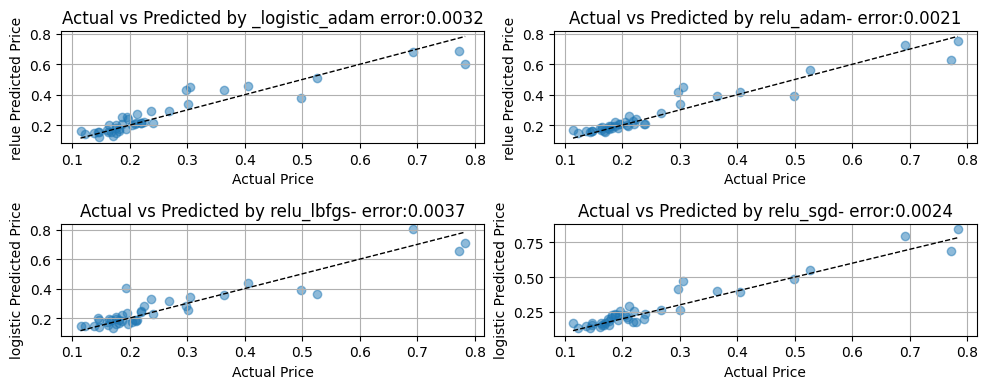

In [ ]:
plt.figure(figsize=(10, 4)) # Set the figure size, which affects subplot sizes


plt.subplot(2, 2, 1) # subplot(rows, columns, index)
plt.scatter(y_test, y_pred_logistic_adam, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--' , lw=1) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Price")
plt.ylabel("relue Predicted Price")
plt.title(f"Actual vs Predicted by _logistic_adam error:{mse_logestic_adam:.4f}")
# plt.legend() # No need for legend in scatter plot
plt.grid(True)

plt.subplot(2, 2, 2) # subplot(rows, columns, index)
plt.scatter(y_test, y_pred_relu_adam, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--' , lw=1) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Price")
plt.ylabel("relue Predicted Price")
plt.title(f"Actual vs Predicted by relu_adam- error:{mse_relu_adam:.4f}")
# plt.legend() # No need for legend in scatter plot
plt.grid(True)


plt.subplot(2, 2, 3) # subplot(rows, columns, index)
plt.scatter(y_test, y_pred_relu_lbfgs, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--' , lw=1) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Price")
plt.ylabel("logistic Predicted Price") # Corrected ylabel
plt.title(f"Actual vs Predicted by relu_lbfgs- error:{mse_relu_lbfgs:.4f}")
# plt.legend() # No need for legend in scatter plot
plt.grid(True)

plt.subplot(2, 2, 4) # subplot(rows, columns, index)
plt.scatter(y_test, y_pred_relu_sgd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--' , lw=1) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Price")
plt.ylabel("logistic Predicted Price") # Corrected ylabel
plt.title(f"Actual vs Predicted by relu_sgd- error:{mse_relu_sgd:.4f}")
# plt.legend() # No need for legend in scatter plot
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()